In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
dtf = pd.read_csv("bank-additional.csv", delimiter=';')
dtf.rename(columns={'y':'deposit'}, inplace=True)

In [3]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
dtf.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [5]:
dtf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [6]:
dtf.dtypes.value_counts()


object     11
int64       5
float64     5
Name: count, dtype: int64

In [7]:
dtf.describe

<bound method NDFrame.describe of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

     

In [8]:
dtf.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


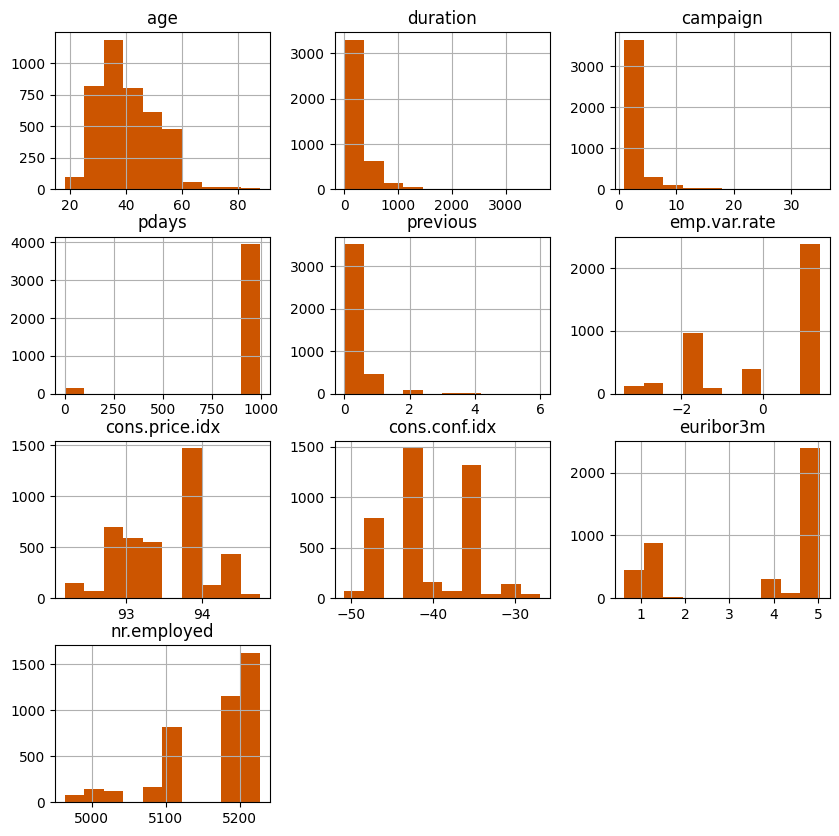

In [9]:
dtf.hist(figsize=(10,10),color='#cc5500')
plt.show()

In [10]:
category_cols = dtf.select_dtypes(include='object').columns
print(category_cols)

number_cols = dtf.select_dtypes(exclude='object').columns
print(number_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [12]:
cor =dtf.corr()

ValueError: could not convert string to float: 'blue-collar'

In [14]:
cor = cor[abs(cor)>=0.90]
sns.heatmap(cor,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

NameError: name 'cor' is not defined

In [15]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1 = dtf.copy()
df1.drop(high_corr_cols,inplace=True,axis=1)  


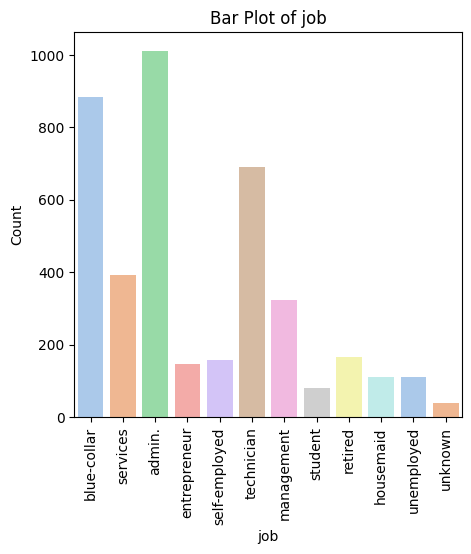

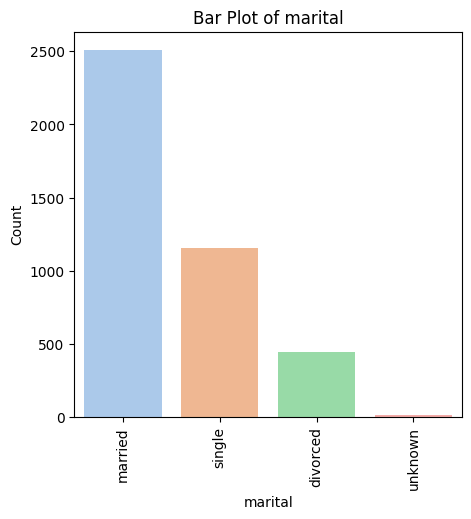

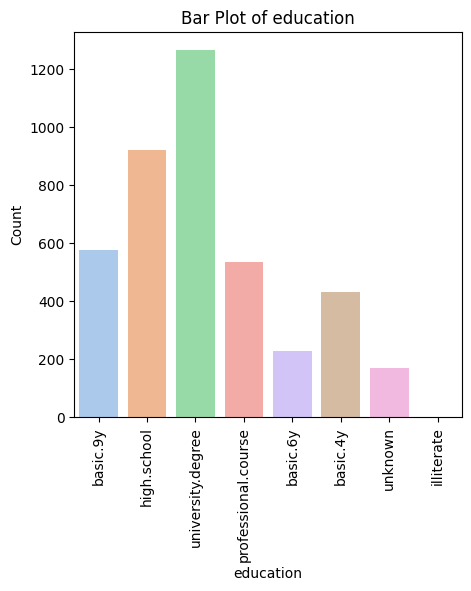

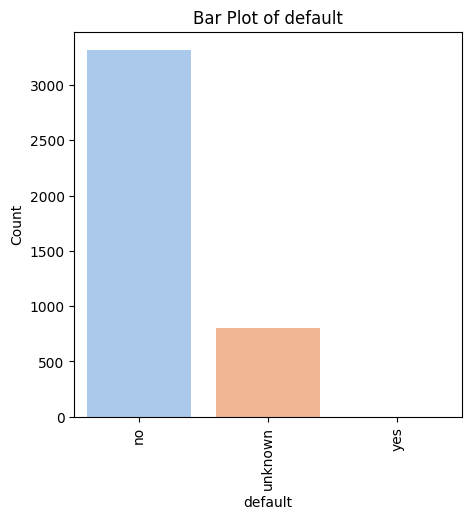

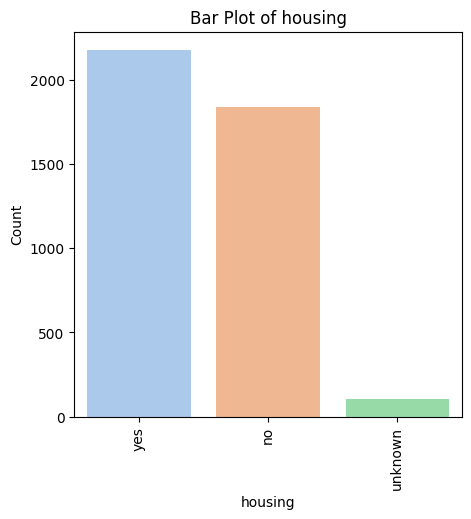

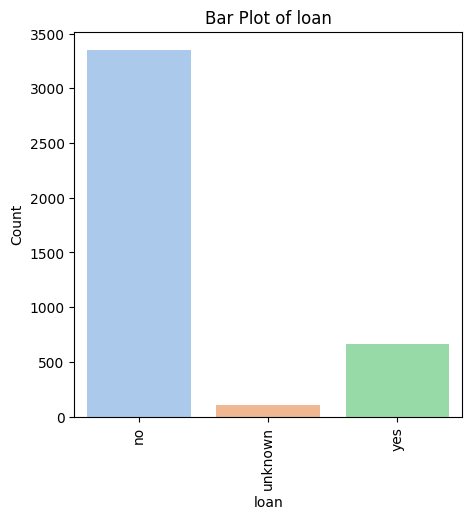

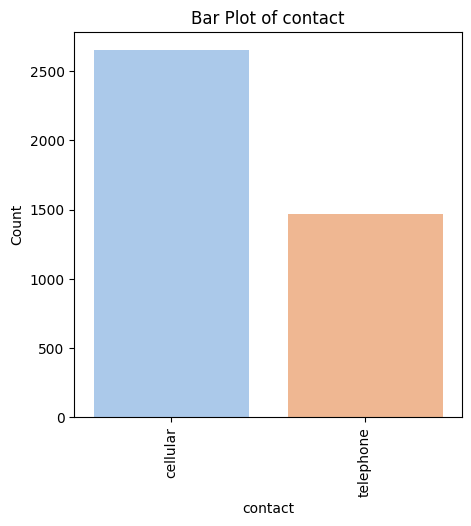

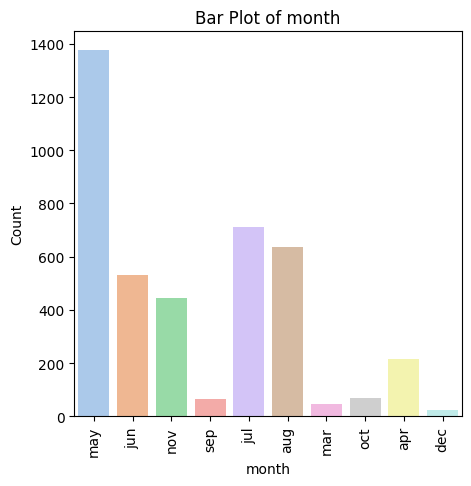

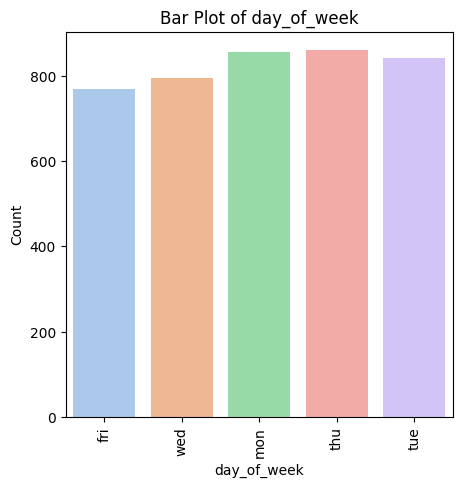

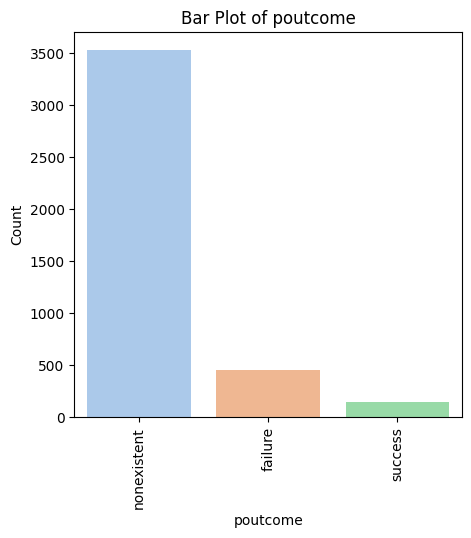

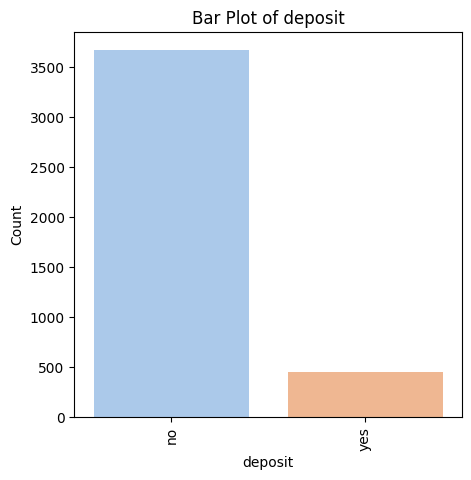

In [16]:
for feature in category_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=dtf, palette='pastel')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dtf_encoded = df1.apply(lb.fit_transform)
dtf_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [18]:
X = dtf_encoded.drop('deposit',axis=1)  
y = dtf_encoded['deposit']  

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [20]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dtf.fit(X_train,y_train)
cn = ['no','yes']

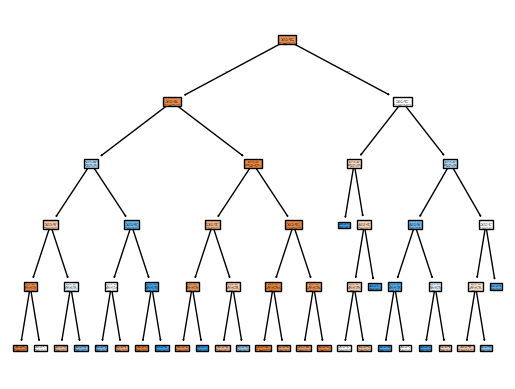

In [21]:
plot_tree(dtf,class_names=cn,filled=True)
plt.show()